# Assignment 09-29
Analysis NBA data

In [60]:
import pandas as pd
import numpy as np
df_nba = pd.read_excel('./data/NBA_Analysis.xlsx',sheet_name='完整数据')
df_nba

,Unnamed: 0,Team,Game,Date,Year_Month,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,2014-10,Away,TOR,L,102,109,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,2014-11,Home,IND,W,102,92,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,2014-11,Away,SAS,L,92,94,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,2014-11,Away,CHO,L,119,122,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,2014-11,Home,NYK,W,103,96,...,8,11,0.727,13,44,26,2,6,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,78119,WAS,78,2018-04-03,2018-04,Away,HOU,L,104,120,...,18,27,0.667,10,46,26,13,3,9,14
9836,79119,WAS,79,2018-04-05,2018-04,Away,CLE,L,115,119,...,22,28,0.786,5,35,26,10,3,16,14
9837,80119,WAS,80,2018-04-06,2018-04,Home,ATL,L,97,103,...,16,23,0.696,7,50,24,5,5,18,22
9838,81124,WAS,81,2018-04-10,2018-04,Home,BOS,W,113,101,...,22,27,0.815,13,44,22,14,1,16,18


In [61]:
df_nba_check = df_nba[['Team','Year_Month']]
df_nba_check['TeamPoints'] = df_nba['TeamPoints'] - df_nba['OpponentPoints']
df_nba_check['FieldGoals'] = df_nba['FieldGoals'] - df_nba['Opp.FieldGoals']
df_nba_check['X3PointShots'] = df_nba['X3PointShots'] - df_nba['Opp.3PointShots']
df_nba_check['FreeThrows'] = df_nba['FreeThrows'] - df_nba['Opp.FreeThrows']
df_nba_check['OffRebounds'] = df_nba['OffRebounds'] - df_nba['Opp.OffRebounds']
df_nba_check['TotalRebounds'] = df_nba['TotalRebounds'] - df_nba['Opp.TotalRebounds']
df_nba_check['Assists'] = df_nba['Assists'] - df_nba['Opp.Assists']
df_nba_check['Steals'] = df_nba['Steals'] - df_nba['Opp.Steals']
df_nba_check['Blocks'] = df_nba['Blocks'] - df_nba['Opp.Blocks']
df_nba_check['Turnovers'] = df_nba['Turnovers'] - df_nba['Opp.Turnovers']
df_nba_check['TotalFouls'] = df_nba['TotalFouls'] - df_nba['Opp.TotalFouls']

df_corr = df_nba_check.corr('pearson',numeric_only=True, min_periods=1)
df_corr

C:\Users\I030187\AppData\Local\Temp\ipykernel_26076\3117795405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba_check['TeamPoints'] = df_nba['TeamPoints'] - df_nba['OpponentPoints']
C:\Users\I030187\AppData\Local\Temp\ipykernel_26076\3117795405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba_check['FieldGoals'] = df_nba['FieldGoals'] - df_nba['Opp.FieldGoals']
C:\Users\I030187\AppData\Local\Temp\ipykernel_26076\3117795405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

,TeamPoints,FieldGoals,X3PointShots,FreeThrows,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls
TeamPoints,1.000000,0.801728,0.496768,0.168467,-0.035847,0.469721,0.607906,0.256370,0.266333,-0.213794,-0.097474
FieldGoals,0.801728,1.000000,0.258324,-0.361686,-0.007754,0.391459,0.640946,0.240777,0.234308,-0.236917,0.246120
X3PointShots,0.496768,0.258324,1.000000,-0.164595,-0.095187,0.087596,0.417173,0.017864,0.134106,0.034198,0.165912
FreeThrows,0.168467,-0.361686,-0.164595,1.000000,0.008637,0.147185,-0.222335,0.054871,0.009666,-0.017679,-0.683813
OffRebounds,-0.035847,-0.007754,-0.095187,0.008637,1.000000,0.624031,-0.140228,-0.002498,-0.222840,0.000773,-0.037069
TotalRebounds,0.469721,0.391459,0.087596,0.147185,0.624031,1.000000,0.204720,-0.198024,0.043164,0.348263,-0.050922
Assists,0.607906,0.640946,0.417173,-0.222335,-0.140228,0.204720,1.000000,0.112265,0.245056,-0.089042,0.149611
Steals,0.256370,0.240777,0.017864,0.054871,-0.002498,-0.198024,0.112265,1.000000,-0.015171,-0.741248,-0.015766
Blocks,0.266333,0.234308,0.134106,0.009666,-0.222840,0.043164,0.245056,-0.015171,1.000000,0.052182,-0.019979
Turnovers,-0.213794,-0.236917,0.034198,-0.017679,0.000773,0.348263,-0.089042,-0.741248,0.052182,1.000000,0.100006


In [63]:
import numpy as np
# get the top 5 indexes related to Win or Loss
df_corr['TeamPointsGAP_Absolute_value'] = np.absolute(df_corr['TeamPoints'])
df_top_fact = df_corr['TeamPointsGAP_Absolute_value'].sort_values(ascending=False).iloc[[0,1,2,3,4,5]]

indexs = np.array(df_top_fact.index)
indexs

array(['TeamPoints', 'FieldGoals', 'Assists', 'X3PointShots',
       'TotalRebounds', 'Blocks'], dtype=object)

In [81]:
# this dataframe includes the index which is with strong correlation with match result
df_nba_diagram = df_nba.groupby('Year_Month').mean()
df_nba_diagram = df_nba_diagram[indexs]
df_nba_diagram = df_nba_diagram.reset_index()
df_nba_diagram

C:\Users\I030187\AppData\Local\Temp\ipykernel_26076\1481723300.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_nba_diagram = df_nba.groupby('Year_Month').mean()


,Year_Month,TeamPoints,FieldGoals,Assists,X3PointShots,TotalRebounds,Blocks
0,2014-10,98.903846,36.403846,20.692308,7.211538,42.423077,5.057692
1,2014-11,99.736486,37.110360,21.592342,7.641892,42.333333,4.657658
2,2014-12,101.311159,38.124464,22.263948,7.931330,43.143777,4.903433
3,2015-01,99.211207,37.308190,22.118534,7.778017,43.672414,4.907328
4,2015-02,98.866460,37.006211,21.972050,7.860248,44.251553,4.835404
5,2015-03,100.076271,37.599576,22.125000,7.938559,43.311441,4.711864
6,2015-04,101.220833,38.237500,22.429167,8.120833,43.504167,4.679167
7,2015-10,102.460526,37.315789,20.894737,7.776316,45.710526,5.131579
8,2015-11,100.188341,37.177130,21.672646,8.327354,43.912556,5.150224
9,2015-12,101.552632,37.925439,21.910088,8.410088,43.350877,4.741228


In [83]:
# add trend line
def trend(df,colum,date_month_colum='Order Date Year Month'):
    x_num = np.arange(len(df[date_month_colum]))

    z=np.polyfit(x_num, np.array(df[colum]), 1)
    p = np.poly1d(z)
    return p(x_num)

trend_array = [trend(df_nba_diagram,idx,'Year_Month') for idx in indexs]
trend_array


[array([ 99.32163844,  99.63933701,  99.95703557, 100.27473414,
        100.59243271, 100.91013128, 101.22782985, 101.54552842,
        101.86322698, 102.18092555, 102.49862412, 102.81632269,
        103.13402126, 103.45171983, 103.76941839, 104.08711696,
        104.40481553, 104.7225141 , 105.04021267, 105.35791124,
        105.6756098 , 105.99330837, 106.31100694, 106.62870551,
        106.94640408, 107.26410265, 107.58180121, 107.89949978]),
 array([36.99581883, 37.11104642, 37.22627401, 37.3415016 , 37.45672919,
        37.57195677, 37.68718436, 37.80241195, 37.91763954, 38.03286713,
        38.14809472, 38.26332231, 38.3785499 , 38.49377748, 38.60900507,
        38.72423266, 38.83946025, 38.95468784, 39.06991543, 39.18514302,
        39.30037061, 39.41559819, 39.53082578, 39.64605337, 39.76128096,
        39.87650855, 39.99173614, 40.10696373]),
 array([21.40979911, 21.48984236, 21.5698856 , 21.64992884, 21.72997209,
        21.81001533, 21.89005857, 21.97010182, 22.05014506, 22.

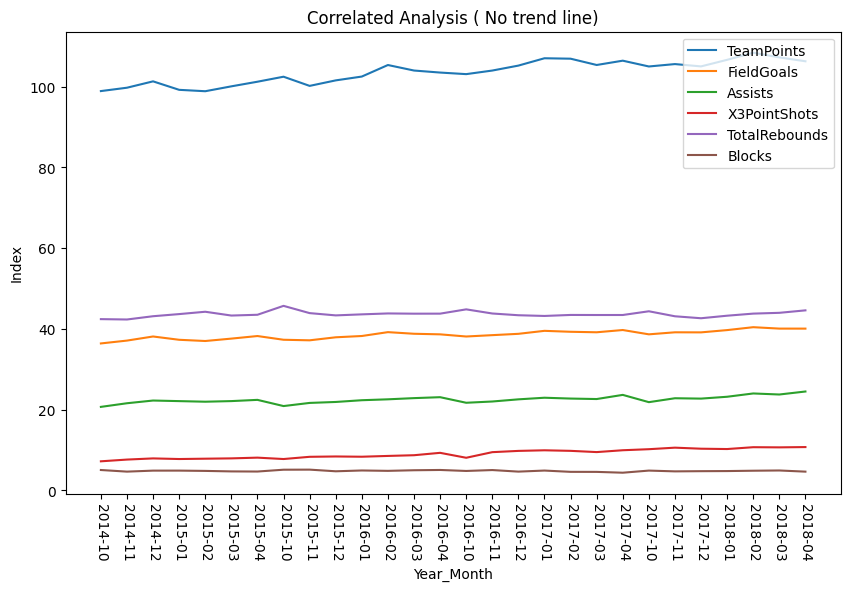

In [86]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))

count = -1
for idx in indexs:
    plt.plot(df_nba_diagram['Year_Month'], df_nba_diagram[idx], label=idx)
    

plt.xlabel('Year_Month')
plt.ylabel('Index')
plt.title('Correlated Analysis ( No trend line)')
plt.xticks(rotation=270)
plt.legend()
plt.show()

从没有趋势线的图上看，我们选取的相关指标确实和最后的成绩相关。
- 随着时间推移，分数的差有所波动
- 比分的差距随时间推移，有变大的趋势
- 基本上所有的指标也相应波动

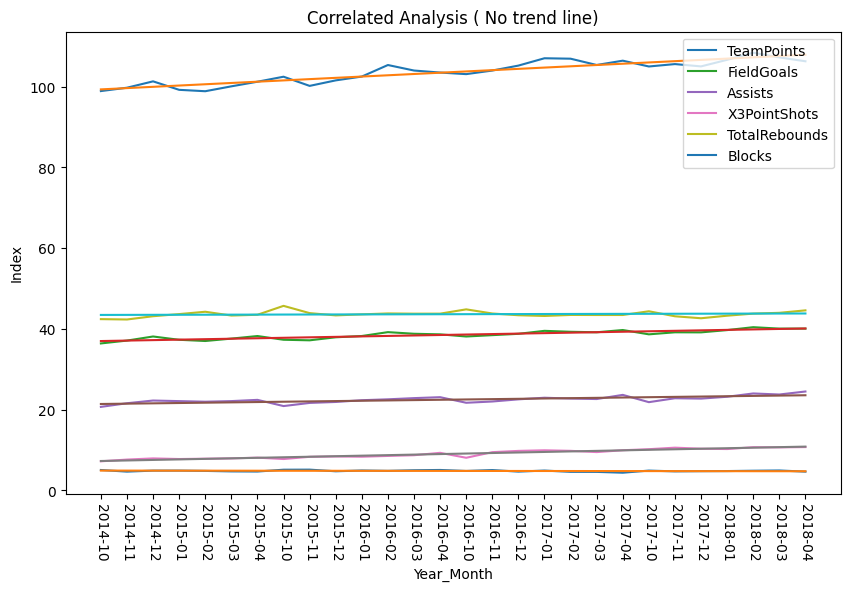

In [87]:
plt.figure(figsize=(10, 6))

count = -1
for idx in indexs:
    plt.plot(df_nba_diagram['Year_Month'], df_nba_diagram[idx], label=idx)
    count += 1
    plt.plot(df_nba_diagram['Year_Month'], trend_array[count])

plt.xlabel('Year_Month')
plt.ylabel('Index')
plt.title('Correlated Analysis ( No trend line)')
plt.xticks(rotation=270)
plt.legend()
plt.show()

## Analysis Conclusion
我们选取了5个和最后比分的差值有关的指标（相关系数最大）。通过对于时间的汇总分析，有几个发现。（从上到下，第n条线）
- 总体上比赛获胜的比分随时间有增大趋势（第一条线）
- 在比较相关的指标中，Assists（助攻）也有随着时间增大趋势
- 所以，助攻的提高可以让比分差更大，而且可以随着时间提高，也就是说可以通过训练待方式，提高助攻的质量。


## 结论
NBA以后可以继续在助攻方面加强训练，从而得到更加好的成绩